<a href="https://colab.research.google.com/github/NervOUs11/Cat_or_Dog/blob/main/CatVSDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
#install kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#Configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
#Download dataset from kaggle
!kaggle datasets download -d tongpython/cat-and-dog

 97% 212M/218M [00:01<00:00, 148MB/s]
100% 218M/218M [00:01<00:00, 170MB/s]


In [7]:
#Extract the zip file
from zipfile import ZipFile
dataset = '/content/cat-and-dog.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall() 

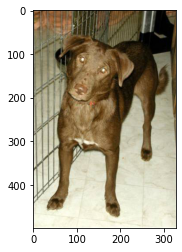

In [9]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg

# Show dog image
img = mpimg.imread('/content/training_set/training_set/dogs/dog.1.jpg')
imgplt = plt.imshow(img)
plt.show()

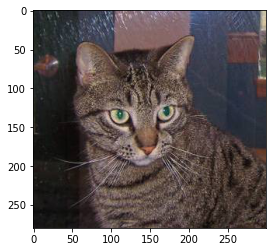

In [10]:
# Show cat image
img = mpimg.imread('/content/training_set/training_set/cats/cat.1.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
# Resize image
AUTO = tf.data.experimental.AUTOTUNE
def resize_image(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32) 
    image = tf.image.resize(image, (256, 256))  
    return (image, label)

data_train = data_train.map(resize_image).prefetch(AUTO)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D 

# Build model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (256,256,3)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256, 256, 32)      128       
                                                                 
 conv2d_2 (Conv2D)           (None, 254, 254, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 123008)           

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Train model

In [ ]:
# Test model

In [ ]:
# Upload new image file to the model